In [30]:
# 导入需要的库
import pandas as pd
import numpy as np
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.style.use('ggplot')



def ret_df(w):
    """
    1.计算指数收益率，形成序列
    2.对每个指数收益率序列计算中位数
    3.对中位数进行排序
    """   
    path = 'D:\\Quant_Code\\data\\index\\weekly_index.csv'
#     path = 'D:\\Quant_Code\\data\\index\\weekly_sw_3.csv'
    df = pd.read_csv(path)
    df_list =  list()
    codes = df['code'].unique().tolist()
    for i in codes:
        df_t = df[df['code'] == i]
        df_t.reset_index(drop=True,inplace=True)
        df_t['ret'] =(df_t['close_last']/df_t['close_last'].shift(w)-1)    #计算收益率     
        df_t= df_t.iloc[w:].fillna(0)     
        df_list.append(np.median(df_t['ret'])) #计算中位数
 
    res = sorted(dict(zip(codes,df_list)).items(),key=lambda x:x[1],reverse=True) #排序
    codes_sorted = list()
    for i in res:
        codes_sorted.append(i[0])
          
    return codes_sorted

def get_ETF_filt(path='D:\\Quant_Code\\data\\ETF\\ETF_filt.csv'):  
    df = pd.read_csv(path,encoding='utf-8')
    df['fee'] = df['fee'].apply(lambda x: format_str(x))
    df['fee'] = df['fee'].astype('float')
    return df

   
def format_str(se):
    return re.sub(r'[\%]', "", str(se)) #替换字符'%'
def format_str_code(se):
    return re.sub(r'[\D]', "", str(se)) #替换非数字的字符,去除ETF代码中的特殊字符

def get_ETF_codes():   
    codes = ret_df(12)[0:66] #选取排名靠前的66个指数
    df = get_ETF_filt()
    codes_list = list()
    names_list = list()
    for code in codes:
        df_t = df[df['index_code']==code]
        df_t.sort_values(by=['fee'],ascending=True,inplace=True)
        if df_t['name'].tolist()[0:2]:
            codes_list.append(df_t['name'].tolist()[0])
            names_list.append(df_t['code'].tolist()[0])
    #[format_str_code(i) for i in names_list]
    return [format_str_code(i) for i in names_list],codes_list 

def get_weekly_ETF_data(path='D:\\Quant_Code\\data\\ETF_weekly\\weekly_ETF_hfq20220113.csv'):
    df_list =list()
    df = pd.read_csv(path)
    df['code'] = df['code'].apply(lambda x: format_str_code(x))
    cols =['date','code','close_hfq_last']
    names,codes = get_ETF_codes() #names:代码，codes:汉字名
    
    df_t = df[cols].copy()
    for code in names:        
        df_s = df_t[df_t['code']==code].copy()
        if df_s.shape[0] >= 52:        
            df_s = df_s.iloc[-52:].copy()
            df_s.set_index(['date','code'],inplace=True)
            df_list.append(df_s)
    df_res =pd.concat(df_list,axis=0)
    cols = [''.join(col) for col in df_res.columns.values] #把双层索引连接成字符串
    df_res.columns = [format_str_code(i) for i in cols] #保留双层索引数字部分
    
    return df_res.unstack()


df = get_weekly_ETF_data()


df.columns = [i[1] for  i in df.columns] #把双层索引转为单层索引

df.head()


ipykernel_launcher:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,159807,159906,159928,159929,159949,159952,159962,159966,159967,159973,...,512670,512690,512710,512770,515000,515030,515200,515210,515580,515790
date,,,,,,,,,,,,,,,,,,,,,
2021-01-17,1.818,1.718,5.315,2.620,1.433,1.951,1.553,2.162428,2.826726,2.096,...,2.163,2.652,1.949,2.477,2.023,1.839,2.136,1.274,1.860859,1.287
2021-01-24,1.671,1.638,5.324,2.450,1.330,1.819,1.557,2.042464,2.622998,2.008,...,1.942,2.678,1.737,2.303,1.858,1.688,1.992,1.229,1.714713,1.224
2021-01-31,1.675,1.706,5.571,2.570,1.377,1.855,1.603,2.103984,2.688482,2.005,...,1.822,2.833,1.641,2.348,1.833,1.673,1.996,1.238,1.699698,1.202
2021-02-07,1.779,1.801,6.025,2.748,1.476,1.981,1.699,2.227024,2.870382,2.166,...,1.941,3.046,1.748,2.529,1.934,1.774,2.135,1.259,1.813812,1.279
2021-02-14,1.717,1.710,5.964,2.657,1.406,1.905,1.752,2.174732,2.713948,2.133,...,1.915,2.919,1.727,2.431,1.890,1.712,2.068,1.326,1.775774,1.244


ipykernel_launcher:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


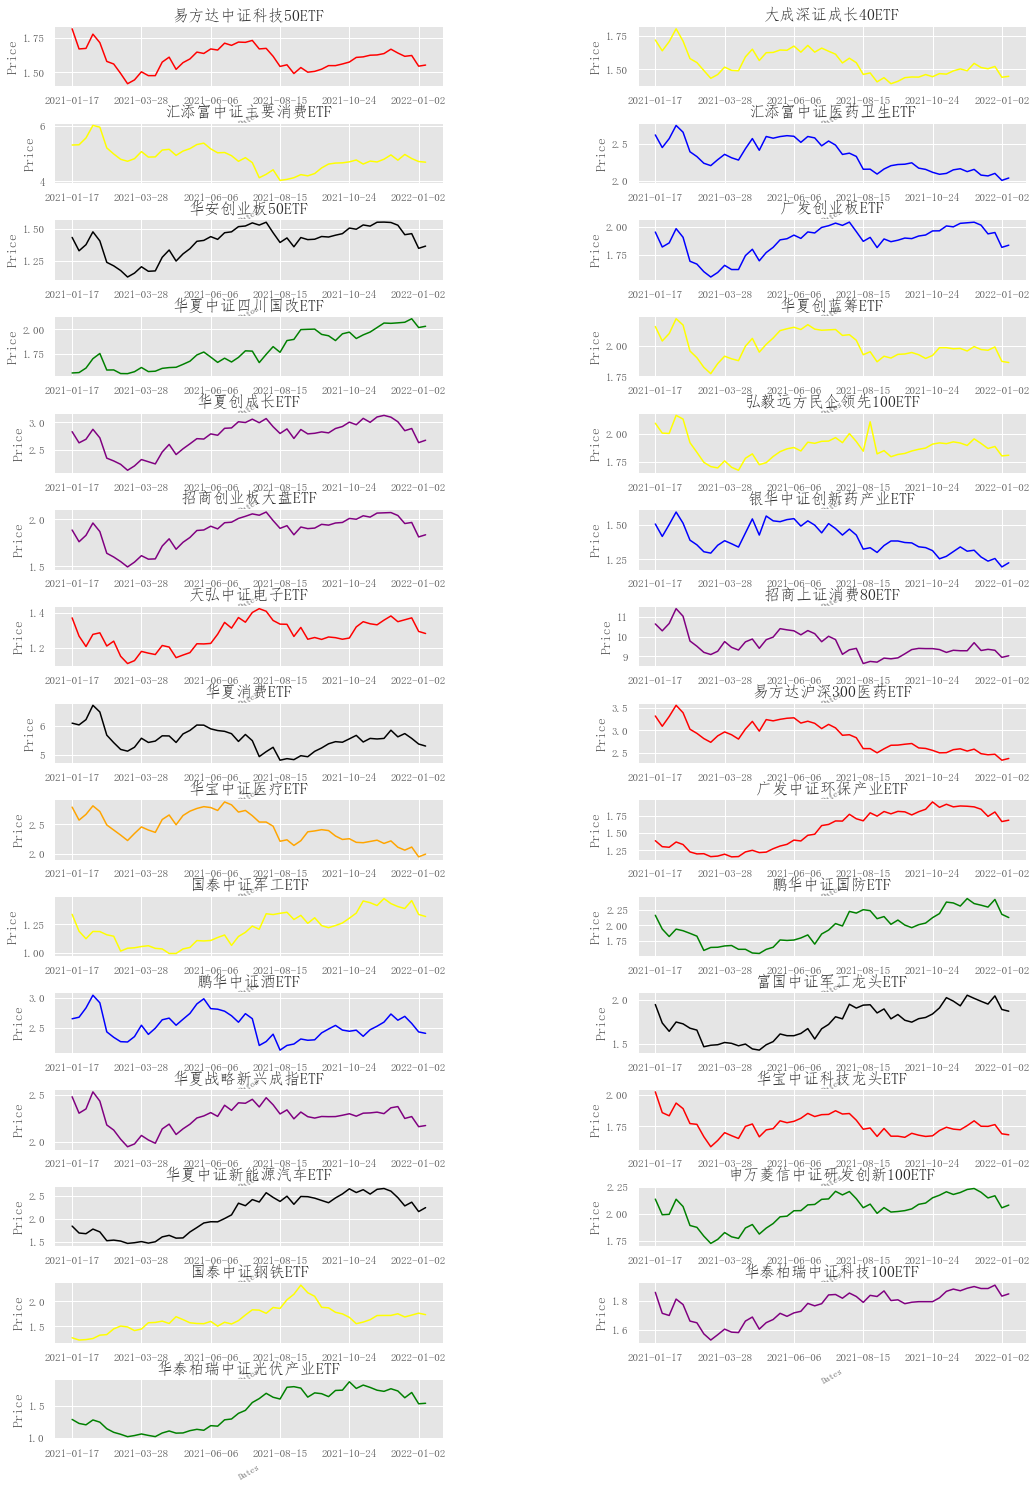

In [22]:
import pylab as mpl     #import matplotlib as mpl
import matplotlib.ticker as ticker
import random 
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


codes, names = get_ETF_codes()
code_dict = dict(zip(codes,names))

fig1 =plt.figure(figsize=(20,26))
plt.subplots_adjust(hspace=.6,wspace=.5) # it adds space in between plots

for i in range(0,len(df.columns)):
    plt.subplot(15,2,i+1)
    ax = plt.gca()    
    ax.plot(df[df.columns[i]], color =random.choice(['green','red','blue','yellow','black','purple','orange']))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
    # ax.set_ylim(0,8)
    ax.set_xlabel('Dates',fontsize=9,rotation=30)
    ax.set_ylabel('Price',fontsize =14)
    ax.set_title(code_dict[df.columns[i]],fontsize =16)
    fig1.subplots_adjust(right=0.8)  #把图例往左移动

plt.show()
fig1.savefig('D:\\Quant_Code\\data\\plot_ETF\\prices.png',dpi=fig1.dpi)



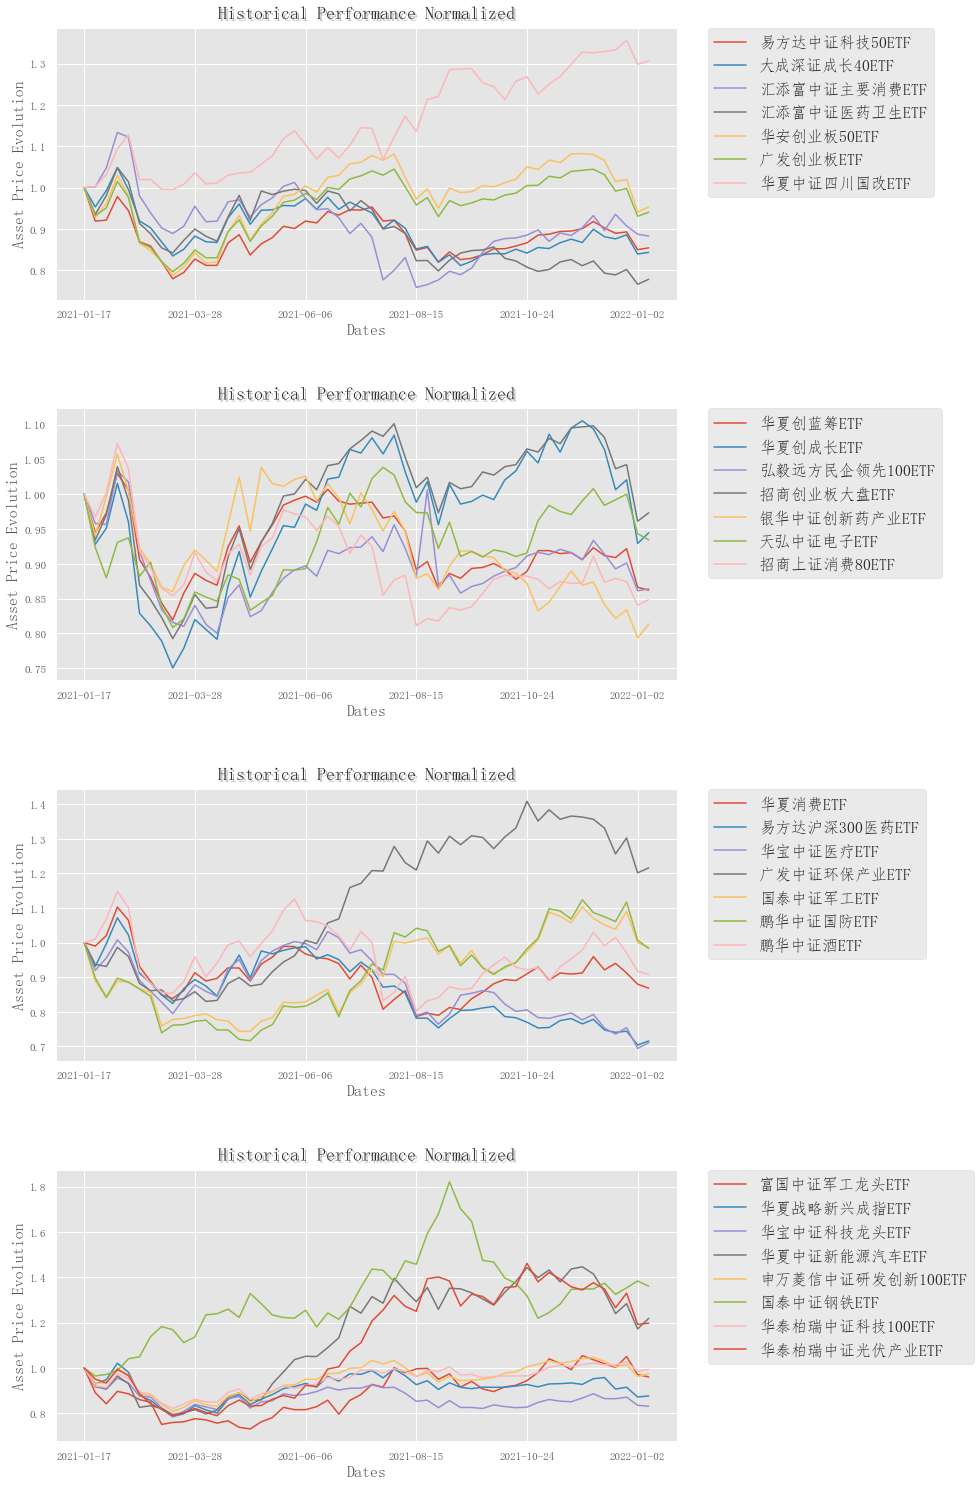

In [23]:
normalized_series = df/df.iloc[0]
normalized_series.head()
from matplotlib import patheffects
fig2 =plt.figure(figsize=(15,26))
plt.subplots_adjust(hspace=.4,wspace=.5) # it adds space in between plots
x = [0,7,14,21,29]
for i in range(0,4):
    plt.subplot(4,1,i+1)
    ax = plt.gca()
    ax.plot(normalized_series.iloc[:,x[i]:x[i+1]])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

    title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                            verticalalignment = 'bottom')
    title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
    pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                        alpha = 0.8)
    xlabel_obj = plt.xlabel('Dates', fontsize = 16)
    ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
    
    legend_list = list()
    for i in range(x[i],x[i+1]):
        legend_list.append(code_dict[df.columns[i]])


    plt.legend(legend_list,fontsize = 16, loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) #把图例放到外面
    fig2.subplots_adjust(right=0.7)  #把图例往左移动
plt.show()
fig2.savefig('D:\\Quant_Code\\data\\plot_ETF\\historical_performance_normalized.png')

In [31]:
codes, names = get_ETF_codes()
code_dict = dict(zip(codes,names))
name_list = list()
for i in df.columns:
    name_list.append(code_dict[i])
df.columns = name_list
df_returns = np.log(df/df.shift(1))
df_returns.dropna(inplace=True)

stats = pd.DataFrame()
stats['Annualized Returns(%)'] =df_returns.mean() * 52 *100
stats['Annualized Volatility(%)'] = df_returns.std() * np.sqrt(52)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] /stats['Annualized Volatility(%)']

print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

ipykernel_launcher:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
易方达中证科技50ETF,-16.0491,22.7786,-0.704571
大成深证成长40ETF,-17.3626,22.8356,-0.760331
汇添富中证主要消费ETF,-12.7119,30.0788,-0.422619
汇添富中证医药卫生ETF,-25.5631,26.5287,-0.963601
华安创业板50ETF,-4.88223,28.838,-0.169299
广发创业板ETF,-6.24995,25.5709,-0.244416
华夏中证四川国改ETF,27.3099,22.6481,1.20584
华夏创蓝筹ETF,-15.1388,22.9675,-0.659142
华夏创成长ETF,-5.80476,32.7915,-0.17702
弘毅远方民企领先100ETF,-14.9017,30.294,-0.491904


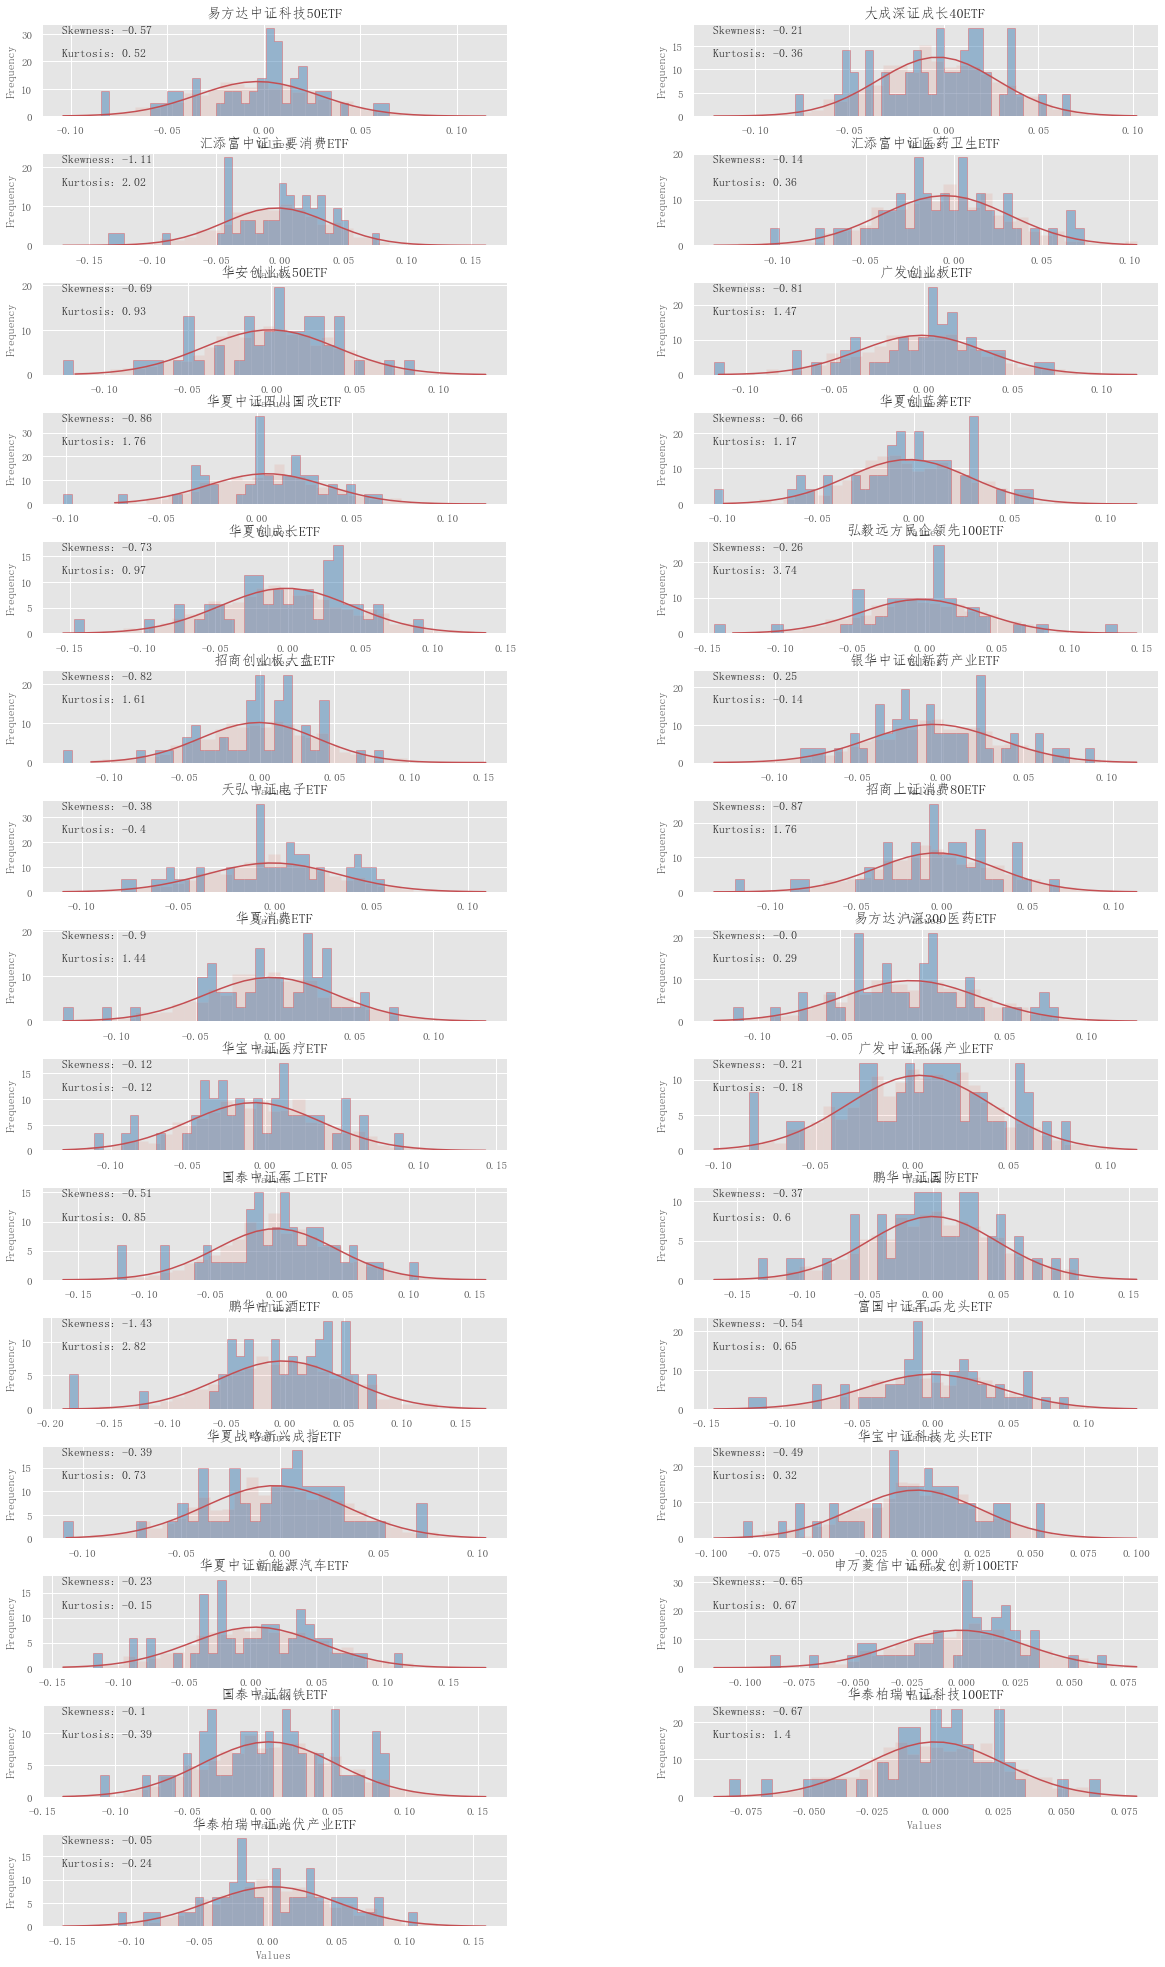

In [36]:
import pylab as mpl     #import matplotlib as mpl
import matplotlib.ticker as ticker
import random 
#设置汉字格式
# sans-serif就是无衬线字体，是一种通用字体族。
# 常见的无衬线字体有 Trebuchet MS, Tahoma, Verdana, Arial, Helvetica,SimHei 中文的幼圆、隶书等等
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

binsnumber = 35


fig3, ax = plt.subplots(figsize=(20,35))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
for i in range(0,len(df.columns)):
    plt.subplot(15,2,i+1)    
    ax = plt.gca()

    ax.hist(df_returns[df_returns.columns[i]], bins=binsnumber, color='steelblue', density = True,
        alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

    sigma, mu = df_returns[df_returns.columns[i]].std(),df_returns[df_returns.columns[i]].mean() # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

    ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(df_returns[df_returns.columns[i]].skew(),2),round(df_returns[df_returns.columns[i]].kurtosis(),2)),
                xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(df_returns.columns[i])


C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


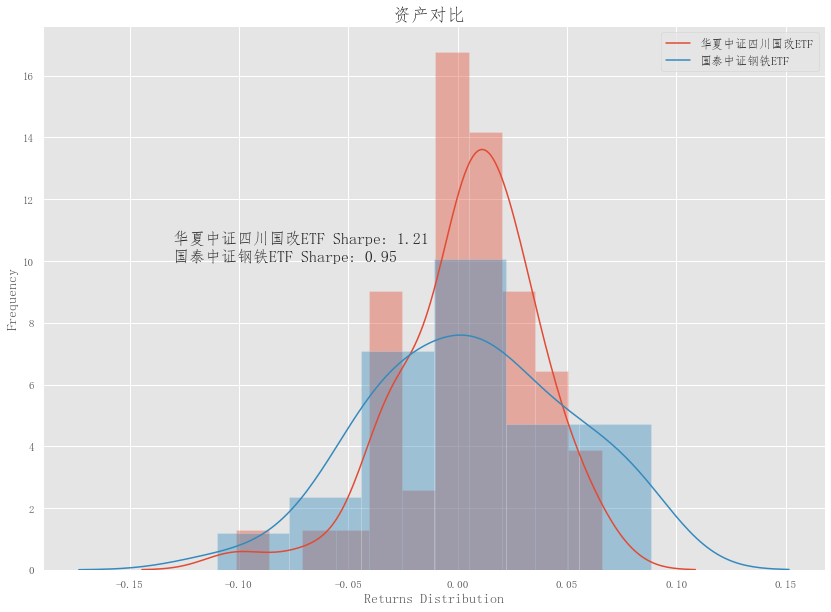

In [53]:

fig4 = plt.figure(figsize=(14,10))
sns.distplot(df_returns['广发创业板ETF'])
sns.distplot(df_returns['国泰中证钢铁ETF'])
plt.legend(('广发创业板ETF','国泰中证钢铁ETF'),fontsize = 12)

# anotate an important value
plt.annotate('广发创业板ETF Sharpe: {}\n国泰中证钢铁ETF Sharpe: {}'.format(round(stats.loc['广发创业板ETF','Sharpe Ratio'],2),round(stats.loc['国泰中证钢铁ETF','Sharpe Ratio'],2)),
            xy=(-.15,8),xycoords = 'data',xytext =(-.13, 10),fontsize=16)
plt.title('资产对比 ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)
    

C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufus\.conda\envs\rufus\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

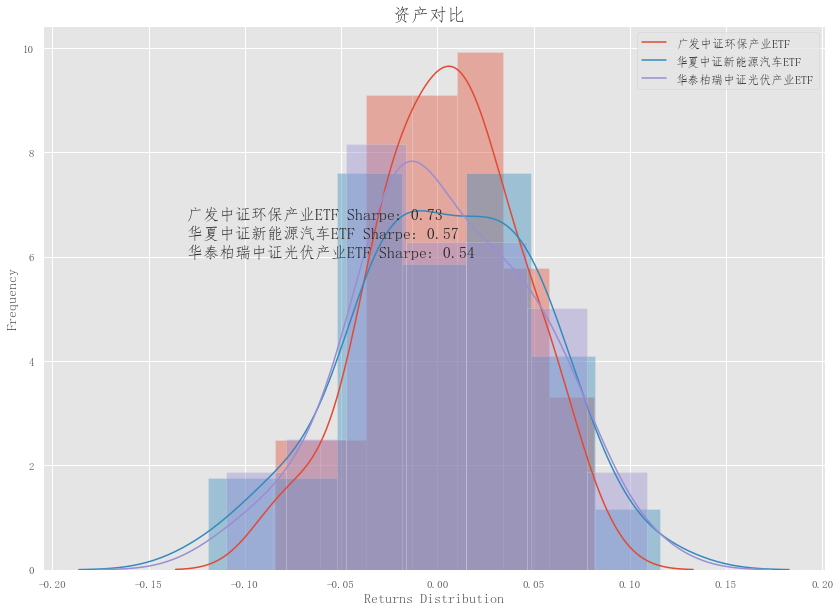

In [58]:
fig5 = plt.figure(figsize=(14,10))
sns.distplot(df_returns['广发中证环保产业ETF'])
sns.distplot(df_returns['华夏中证新能源汽车ETF'])
sns.distplot(df_returns['华泰柏瑞中证光伏产业ETF'])
plt.legend(('广发中证环保产业ETF','华夏中证新能源汽车ETF','华泰柏瑞中证光伏产业ETF'),fontsize = 12)

# anotate an important value
plt.annotate('广发中证环保产业ETF Sharpe: {}\n华夏中证新能源汽车ETF Sharpe: {}\n华泰柏瑞中证光伏产业ETF Sharpe: {}'.format(round(stats.loc['广发中证环保产业ETF','Sharpe Ratio'],2),
                        round(stats.loc['华夏中证新能源汽车ETF','Sharpe Ratio'],2),round(stats.loc['华泰柏瑞中证光伏产业ETF','Sharpe Ratio'],2)),
            xy=(-.15,4),xycoords = 'data',xytext =(-.13, 6),fontsize=16)
plt.title('资产对比 ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();
fig4.savefig('histbonds.png',dpi=fig4.dpi)

In [46]:
df_returns

,易方达中证科技50ETF,大成深证成长40ETF,汇添富中证主要消费ETF,汇添富中证医药卫生ETF,华安创业板50ETF,广发创业板ETF,华夏中证四川国改ETF,华夏创蓝筹ETF,华夏创成长ETF,弘毅远方民企领先100ETF,...,鹏华中证国防ETF,鹏华中证酒ETF,富国中证军工龙头ETF,华夏战略新兴成指ETF,华宝中证科技龙头ETF,华夏中证新能源汽车ETF,申万菱信中证研发创新100ETF,国泰中证钢铁ETF,华泰柏瑞中证科技100ETF,华泰柏瑞中证光伏产业ETF
date,,,,,,,,,,,,,,,,,,,,,
2021-01-24,-0.084315,-0.047685,0.001692,-0.067086,-0.074591,-0.070055,0.002572,-0.057075,-0.074801,-0.042892,...,-0.107778,0.009756,-0.115157,-0.072836,-0.085081,-0.085678,-0.069796,-0.035961,-0.081792,-0.050190
2021-01-31,0.002391,0.040675,0.045350,0.047818,0.034728,0.019598,0.029116,0.029676,0.024659,-0.001495,...,-0.063784,0.056266,-0.056854,0.019351,-0.013547,-0.008926,0.002006,0.007296,-0.008795,-0.018137
2021-02-07,0.060238,0.054191,0.078343,0.066967,0.069429,0.065717,0.058163,0.056833,0.065468,0.077238,...,0.063269,0.072493,0.063166,0.074260,0.053636,0.058618,0.067321,0.016821,0.064980,0.062092
2021-02-14,-0.035473,-0.051849,-0.010176,-0.033676,-0.048587,-0.039120,0.030718,-0.023761,-0.056041,-0.015353,...,-0.013486,-0.042588,-0.012086,-0.039521,-0.023014,-0.035575,-0.031885,0.051849,-0.021194,-0.027747
2021-02-21,-0.083154,-0.079069,-0.135162,-0.104650,-0.124831,-0.117980,-0.101436,-0.104261,-0.147027,-0.103643,...,-0.022176,-0.182116,-0.029379,-0.109896,-0.065032,-0.118952,-0.088419,0.008261,-0.067022,-0.086427
2021-02-28,-0.012098,-0.018525,-0.043144,-0.027538,-0.021997,-0.014877,0.000632,-0.028664,-0.021979,-0.045753,...,-0.024319,-0.038120,-0.013205,-0.025106,-0.003394,0.008516,-0.009021,0.081825,-0.007260,-0.051247
2021-03-07,-0.045209,-0.038782,-0.039445,-0.039427,-0.030103,-0.040997,-0.023636,-0.042911,-0.027355,-0.049662,...,-0.133844,-0.031666,-0.122629,-0.046744,-0.057125,-0.013793,-0.044137,0.037868,-0.047880,-0.029015
2021-03-14,-0.051576,-0.039650,-0.015123,-0.014402,-0.043372,-0.029796,-0.000647,-0.029087,-0.050178,-0.021979,...,0.029577,-0.002206,0.011545,-0.040267,-0.049180,-0.034312,-0.038040,-0.012016,-0.027771,-0.036755
2021-03-21,0.019567,0.019338,0.019699,0.035623,0.026248,0.025414,0.012854,0.045810,0.037041,-0.007042,...,0.001820,0.038983,0.004057,0.015291,0.031020,0.010215,0.021186,-0.049563,0.023942,0.017579


In [18]:
pattern = re.compile(r'.+?\.SZ$')   # 查找.SZ 深交所指数
res_sz =[]
for i in index_code:
    find = pattern.findall(i)
    if find:
        [res_sz.append(item) for item in find]
    
res_sz

['399006.SZ',
 '399330.SZ',
 '399005.SZ',
 '399606.SZ',
 '399001.SZ',
 '399007.SZ',
 '399008.SZ',
 '399624.SZ',
 '399101.SZ',
 '399975.SZ',
 '399986.SZ',
 '399989.SZ',
 '399998.SZ',
 '399396.SZ',
 '399440.SZ',
 '399393.SZ',
 '399965.SZ',
 '980017.SZ',
 '399967.SZ',
 '399987.SZ',
 '399976.SZ',
 '399417.SZ',
 '399808.SZ',
 '399973.SZ',
 '399437.SZ',
 '399971.SZ',
 '399324.SZ',
 '399997.SZ',
 '399995.SZ',
 '399441.SZ',
 '399966.SZ',
 '399699.SZ',
 '399395.SZ',
 '980001.SZ',
 '399806.SZ',
 '399707.SZ',
 '399809.SZ',
 '399291.SZ',
 '399364.SZ',
 '399550.SZ',
 '399368.SZ',
 '399394.SZ',
 '399974.SZ',
 '399970.SZ',
 '399610.SZ',
 '399804.SZ',
 '399993.SZ',
 '399802.SZ',
 '399362.SZ',
 '399807.SZ',
 '399803.SZ',
 '399811.SZ',
 '399992.SZ',
 '399991.SZ',
 '399422.SZ',
 '399293.SZ',
 '399377.SZ',
 '399348.SZ',
 '399673.SZ',
 '399296.SZ',
 '399295.SZ',
 '399326.SZ',
 '399702.SZ',
 '399990.SZ',
 '399701.SZ']

In [19]:
pattern = re.compile(r'.+?\.CSI$')   # 查找.CSI 中证指数
res_csi =[]
for i in index_code:
    find = pattern.findall(i)
    if find:
        [res_csi.append(item) for item in find]
    
res_csi

['H30184.CSI',
 'H30035.CSI',
 'H30165.CSI',
 '930606.CSI',
 '931160.CSI',
 '930697.CSI',
 '930708.CSI',
 '930851.CSI',
 '930614.CSI',
 '931151.CSI',
 '931079.CSI',
 '990001.CSI',
 '000815.CSI',
 '931066.CSI',
 '931152.CSI',
 '931087.CSI',
 '930726.CSI',
 '930743.CSI',
 '930652.CSI',
 '000813.CSI',
 '931139.CSI',
 '930598.CSI',
 '000949.CSI',
 '931380.CSI',
 '930901.CSI',
 '931461.CSI',
 '930713.CSI',
 '930651.CSI',
 'H00813.CSI',
 'H30202.CSI',
 '930601.CSI',
 '930721.CSI',
 '931186.CSI',
 '930707.CSI',
 '000171.CSI',
 '931406.CSI',
 '931187.CSI',
 '930850.CSI',
 '931071.CSI',
 '930648.CSI',
 '930781.CSI',
 '931159.CSI',
 '930902.CSI',
 '000861.CSI',
 '931140.CSI',
 'H30178.CSI',
 '931165.CSI',
 '000811.CSI',
 'H30318.CSI',
 'H30089.CSI',
 '931068.CSI',
 '950096.CSI',
 '931167.CSI',
 '000860.CSI',
 '931372.CSI',
 '000859.CSI',
 '931381.CSI',
 '931166.CSI',
 '931268.CSI',
 '931141.CSI',
 '930875.CSI',
 '931163.CSI',
 '930719.CSI',
 '930758.CSI',
 '931033.CSI',
 '930620.CSI',
 '930703.C

In [31]:
import tushare as ts
pro = ts.pro_api()

df = pro.index_basic(market='SSE')
s1 = set(df['ts_code'].tolist())
s2 = set(res_sh)
print(len(s1),len(s2))
print(len(s1 & s2)) 
index_sh = list(s1 & s2)

595 68
57


In [32]:
df = pro.index_basic(market='SZSE')
s1 = set(df['ts_code'].tolist())
s2 = set(res_sz)
print(len(s1),len(s2))
print(len(s1 & s2)) 
index_sz = list(s1 & s2)

459 65
65


In [33]:
df = pro.index_basic(market='CSI')
s1 = set(df['ts_code'].tolist())
s2 = set(res_csi)
print(len(s1),len(s2))
print(len(s1 & s2)) 
index_csi = list(s1 & s2)

3699 97
85


In [38]:
index_code = index_sh + index_sz + index_csi
len(index_code)
index_code

['000987.SH',
 '000971.SH',
 '000018.SH',
 '000906.SH',
 '000037.SH',
 '000029.SH',
 '000905.SH',
 '000823.SH',
 '000998.SH',
 '000982.SH',
 '000852.SH',
 '000913.SH',
 '000009.SH',
 '000065.SH',
 '000819.SH',
 '000064.SH',
 '000914.SH',
 '000841.SH',
 '000903.SH',
 '000056.SH',
 '000928.SH',
 '000001.SH',
 '000036.SH',
 '000808.SH',
 '000974.SH',
 '000993.SH',
 '000068.SH',
 '000805.SH',
 '000038.SH',
 '000827.SH',
 '000802.SH',
 '000933.SH',
 '000814.SH',
 '000688.SH',
 '000069.SH',
 '000300.SH',
 '000063.SH',
 '000901.SH',
 '000066.SH',
 '000046.SH',
 '000991.SH',
 '000935.SH',
 '000044.SH',
 '000021.SH',
 '000992.SH',
 '000015.SH',
 '000986.SH',
 '000858.SH',
 '000932.SH',
 '000048.SH',
 '000016.SH',
 '000984.SH',
 '000989.SH',
 '000934.SH',
 '000043.SH',
 '000010.SH',
 '000042.SH',
 '399997.SZ',
 '399610.SZ',
 '399348.SZ',
 '399707.SZ',
 '399992.SZ',
 '399966.SZ',
 '399006.SZ',
 '399986.SZ',
 '399998.SZ',
 '399991.SZ',
 '399974.SZ',
 '399368.SZ',
 '399295.SZ',
 '399987.SZ',
 '3993

In [39]:
df = pro.index_basic()
df.head()

,ts_code,name,market,publisher,category,base_date,base_point,list_date
0,000001.CZC,农期指数,OTH,郑州商品交易所,商品指数,None,1000.0,None
1,000001.SH,上证指数,SSE,中证公司,综合指数,19901219,100.0,19910715
2,000002.CZC,农期谷物,OTH,郑州商品交易所,商品指数,None,1000.0,None
3,000002.SH,上证A指,SSE,中证公司,综合指数,19901219,100.0,19920221
4,000003.CZC,农期软商,OTH,郑州商品交易所,商品指数,None,1000.0,None


In [43]:
df_t = df[df['ts_code'].isin(index_code)]

In [44]:
df_t.head()

,ts_code,name,market,publisher,category,base_date,base_point,list_date
1,000001.SH,上证指数,SSE,中证公司,综合指数,19901219,100.00,19910715
17,000009.SH,上证380,SSE,中证公司,规模指数,20031231,1000.00,20101129
19,000010.SH,上证180,SSE,中证公司,规模指数,20020628,3299.06,20020701
24,000015.SH,上证红利,SSE,中证公司,主题指数,20041231,1000.00,20050104
25,000016.SH,上证50,SSE,中证公司,规模指数,20031231,1000.00,20040102


In [48]:
len(df_t['ts_code'].tolist())

207

In [49]:
len(df_t['name'].tolist())

207

In [57]:
import json 

final_res = dict(zip(df_t['name'].tolist(),df_t['ts_code'].tolist())
                )
with open('D:\E-BOOK\\final_index_code.txt', 'w') as f:
    json_str = json.dumps(final_res,indent=0,ensure_ascii=False)
    f.write(json_str)
    f.write('\n')